# **Project: No Show Appointments Data Analysis**

## Table of contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## **Introduction**
### Dataset Description
This dataset collects information from over 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

*"ScheduledDay"* tells us on what day the patient set up their appointment.

*"Neighborhood"* indicates the location of the hospital.

*Scholarship* indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)

### Question(s) for Analysis
$1$. What neighourhoods have the most and least proportion of patients that showed up for appointment?

$2$. Was SMS recieved a major factor to patients showing up or not showing up for their appointment?

$3$. Did Patients who ae addicted to Alcohol miss their appointment more than others?

## Import packages and dataset
The first part of any data analysis project is preparing my data, which means making sure it is in the right place and format for me to conduct my analysis. The first step of any data preparation is importing the packages and raw data and cleaning it.

In [66]:
#Import packages for project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
#Import Raw csv data into dataframe 
df = pd.read_csv("Downloads/noshowappointments-kagglev2-may-2016.csv")

In [68]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## **Data Wrangling**
### General Observations 
Now that I have my data in a DataFrame, it's time to inspect it to see if they need any cleaning.

In [69]:
#Check for number of obsevrations and features 
df.shape

(110527, 14)

Then use the **Info** method to check the data types and number of missing values for each column.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning
It looks like there are a couple of problems in this DataFrame that you need to solve. First,I can see that there are no missing values but the column names would need to be all in lowercase and properly spelled and spaced.

In [71]:
#Clean and Rename columns
df.rename(columns= lambda x: x.strip().lower().replace("-","_"),inplace=True)
df.rename(columns={"patientid":"patient_id",
                   "appointmentid":"appointment_id",
                  "scheduledday":"scheduled_day",
                  "appointmentday":"appointment_day",
                  "handcap":"handicap",
                  "hipertension":"hypertension"},
         inplace=True)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



I noticed that columns *"appointment_day"* and *"scheduled_day"* are "string object" but should be Datetime objects


In [72]:
#Changing "scheduled_day" and "appointment_day" to datetime
df[["scheduled_day","appointment_day"]] = df[["scheduled_day","appointment_day"]].apply(lambda d : pd.to_datetime(d))

Now it is time to Perform some Exploratory Data Analysis on the dataset

<a id='eda'></a>
## **Exploratory Data Analysis (EDA)**
For the purpose of this analysis my dependent variable will be the variable *"no_show"* and I will focus on the following independent variables
1. *neigbhourhood* - categorical data
2. *sms_recieved* - Discrete data
3. *alcoholism*- Numerical data

 
### **Research Question 1**: ( What neighourhoods have the most and least proportion of patients that showed up for appointment?)

Let us find out the number of Neighourhood in this dataset and the distribution of Patients in our dataset across this neighbourhoods

In [73]:
# No of unique neighbourhood in df
df["neighbourhood"].nunique()

81

There are **81** Unique Neighbourhoods in our datatset 

In [74]:
#Dsitribution of patients across the neighbourhoods
print(df["neighbourhood"].value_counts().head(10))
print()
print(df["neighbourhood"].value_counts().head(2))
print()
print(df["neighbourhood"].value_counts().tail(2))

JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
Name: neighbourhood, dtype: int64

JARDIM CAMBURI    7717
MARIA ORTIZ       5805
Name: neighbourhood, dtype: int64

ILHAS OCEÂNICAS DE TRINDADE    2
PARQUE INDUSTRIAL              1
Name: neighbourhood, dtype: int64


We can see that neighbourhoods "**JARDIM CAMBURI"** and "**MARIA ORTIZ**" are the most represented in our dataset while "**ILHAS OCEÂNICAS DE TRINDADE**" and "**PARQUE INDUSTRIAL**" are the least represented.

Let us visualize it.


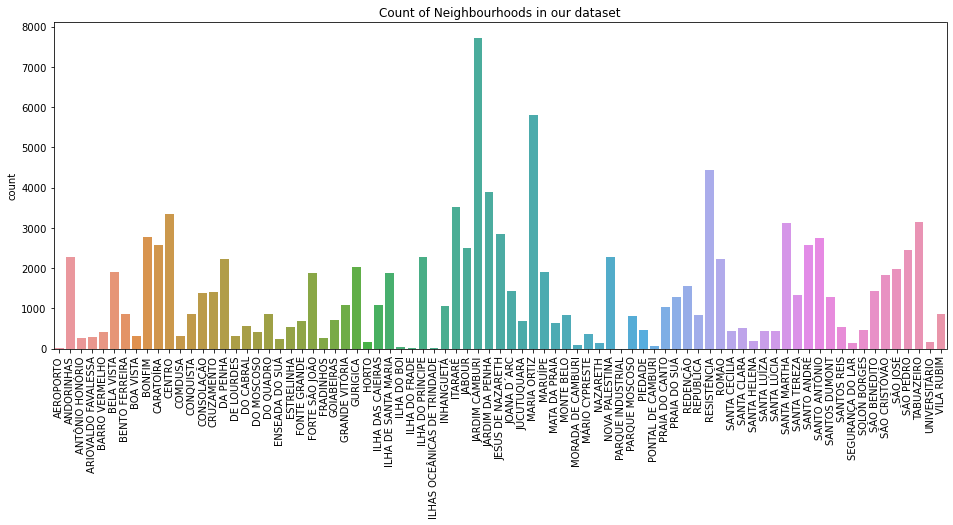

In [75]:
fig,ax = plt.subplots(figsize=(16,6))
plt.xticks(rotation=90)
sns.countplot(x=np.sort(df["neighbourhood"]),ax=ax)
plt.title("Count of Neighbourhoods in our dataset");

Now let us check for the proportion of patients from each neighourhood that showed up for their appointment

First, I want to change the encoding of our dependent variable *"no_show"* such that "No" will be encoded as $0$ and "Yes" will be encoded as $1$

In [76]:
# Change "no_show" encoding
df["no_show"]= df["no_show"].str.replace("No","0").str.replace("Yes","1").astype(int)

Next, I want to create a pivot table to show the different neighbourhoods in our dataset and the proportion of patients that did not show up

In [77]:
neighbourhood_pivot = pd.pivot_table(
    df,index="neighbourhood",
    values="no_show",
    aggfunc= np.mean).sort_values(by="no_show")
neighbourhood_pivot

,no_show
neighbourhood,
PARQUE INDUSTRIAL,0.000000
ILHA DO BOI,0.085714
AEROPORTO,0.125000
MÁRIO CYPRESTE,0.145553
SOLON BORGES,0.147122
...,...
ITARARÉ,0.262664
SANTA CLARA,0.264822
SANTA CECÍLIA,0.274554


In [78]:
#Top ten neigbourhood in terms of proportion that showed up i.e no_show == 0
most_show_up= neighbourhood_pivot.head(10)
most_show_up

,no_show
neighbourhood,
PARQUE INDUSTRIAL,0.000000
ILHA DO BOI,0.085714
AEROPORTO,0.125000
MÁRIO CYPRESTE,0.145553
SOLON BORGES,0.147122
DE LOURDES,0.154098
DO CABRAL,0.157143
SANTA MARTHA,0.158416
JARDIM DA PENHA,0.162755


In [79]:
#Top ten neigbourhood in terms of proportion that did not show up i.e no_show==1
least_show_up= neighbourhood_pivot.tail(10)
least_show_up

,no_show
neighbourhood,
ANDORINHAS,0.230327
CARATOÍRA,0.230409
ILHA DO PRÍNCIPE,0.234775
HORTO,0.240000
JESUS DE NAZARETH,0.243954
ITARARÉ,0.262664
SANTA CLARA,0.264822
SANTA CECÍLIA,0.274554
SANTOS DUMONT,0.289185


Now let us Visualize it.

To do this I want to create a function to plot horizontal bar charts.

In [80]:
def plot_barh(df):
    """Takes in one parameter: df
    and returns a horizontal bar plot
    
        Parameters:
            df: DataFrame containing the data to be plotted
        Returns:
            A horizontal bar plot
    """
    fig,ax= plt.subplots(figsize=(13,6))
    plot = df.plot.barh(ax=ax,legend="None")
    return plot

Now, let us use our plot_barh function to Visualize our *most_show_up and "least_show_up"* DataFrames

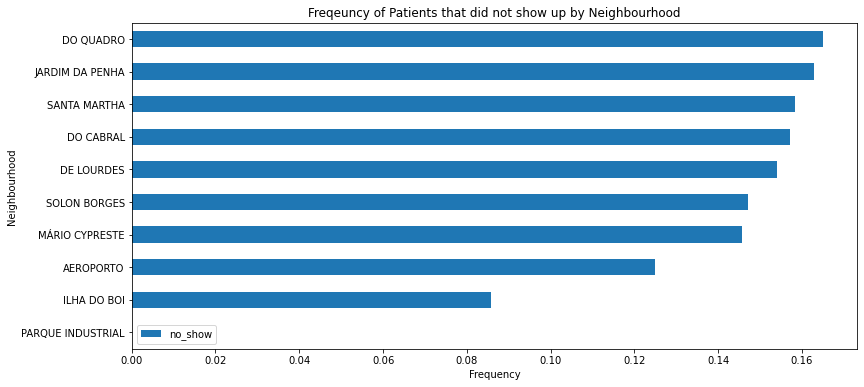

In [81]:
# plot most_show_up
plot_barh(most_show_up)
plt.ylabel("Neighbourhood")
plt.xlabel("Frequency")
plt.title("Freqeuncy of Patients that did not show up by Neighbourhood");

This shows us that patients living in **"PARQUE INDUSTRIAL","ILHA DO BOI","AEROPORTO"** ETC showed up more for their appointments

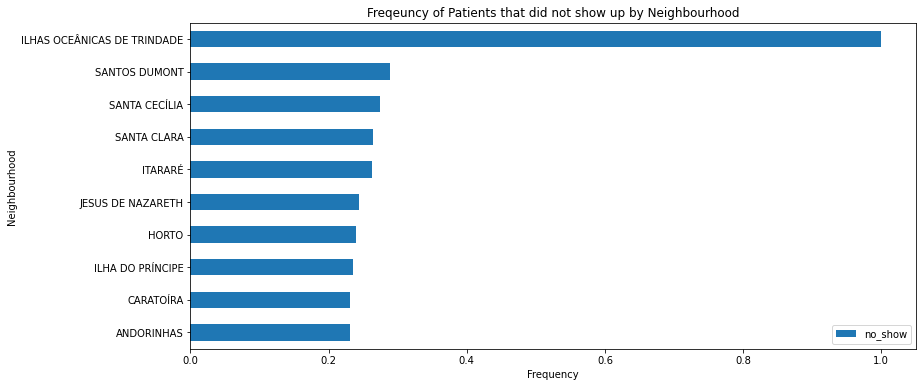

In [82]:
# Plot least_show_up
plot_barh(least_show_up)
plt.ylabel("Neighbourhood")
plt.xlabel("Frequency")
plt.title("Freqeuncy of Patients that did not show up by Neighbourhood");

This shows that Patients living in **"ILHAS OCEÂNICAS DE TRINDADE","SANTOS DUMONT" and "SANTA CLARA"** has the least proportion of apperance for their appointment 

### **Research Question 2**: (Was SMS recieved a major factor to patients showing up or not showing up for their appointment?)


First let me remove the encoding on "*no_show*" from the previous EDA

In [83]:
# Remove "no_show" encoding 
encode_dict = {
    0:"No",
    1: "Yes"
}
df["no_show"].replace(encode_dict,inplace=True)

Then, let us check the ratio of patients that recieved sms to that of those that did not recieve sms

0    0.678974
1    0.321026
Name: sms_received, dtype: float64


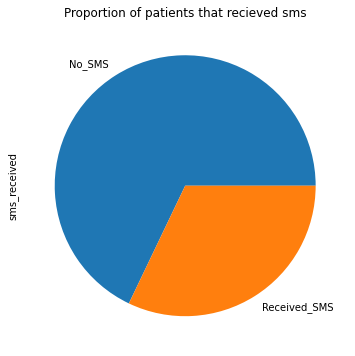

In [84]:
# Check "sms_recieved" ratio
print(df["sms_received"].value_counts(normalize=True))
#plot ratio
fig,ax = plt.subplots(figsize=(15,6))
df["sms_received"].value_counts(normalize=True).plot.pie(labels=["No_SMS","Received_SMS"],ax=ax)
plt.title("Proportion of patients that recieved sms");

We can see that over **68%** of patients in this dataset did not recieve SMS

Now, let us create a side-by-side count plot visualization using seaborn to see relationship between our *"sms_received"* column and "no_show" column

To do this I want to create a function named "*plot_countplot*"

In [85]:
#Create "plot_countplot" function
def plot_countplot(col_name,hue_col):
    """Takes in two parameters:"col_name","hue_col"
    and returns a side by side countplot
    
        Parameters:
            col_name(str): column for plotting
            hue_col(str): column for hue
        Returns:
            A seaborn countplot
    """
    fig,ax= plt.subplots(figsize=(10,6))
    fig =sns.countplot(x= col_name, hue=hue_col, data=df,ax=ax)
    return fig
    

Now that I have created my function for plotting, Let's explore the relationship

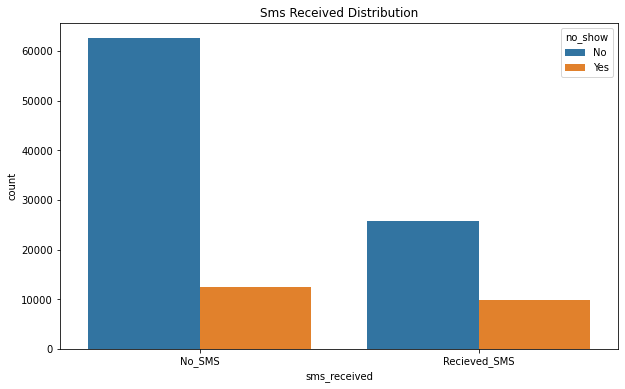

In [86]:
# Explore relationship between "sms_received" and "no_show"
fig = plot_countplot("sms_received","no_show")
fig.set_xticklabels(["No_SMS","Recieved_SMS"])
plt.title("Sms Received Distribution");

This is an interesting plot usually we should expect patients who recieved **SMS** to show up more than those who did not but it does not seem to be the case here 
Let us check out the actual figures to support this knowledge

First I will start by creating two different DataFrames: *df_sms* for patients that recieved sms encoded as *"sms_recieved"== 1* and *df_no_sms* for patients that did not receive sms encoded as *"sms_recieved"== 0*

In [87]:
# Create df_sms mask
mask = df["sms_received"]== 1

#create df_sms
df_sms = df[mask]

# Check df_sms
df_sms["sms_received"].head(2)

11    1
15    1
Name: sms_received, dtype: int64

In [88]:
# Create df_no_sms mask
mask = df["sms_received"]== 0

# Create df_no_sms
df_no_sms = df[mask]

# Check df_no_sms
df_no_sms["sms_received"].head(2)

0    0
1    0
Name: sms_received, dtype: int64

Now let us check for the proportion of *"no_show"* in each of our DataFrames  


In [89]:
# Check proportion for df_no_sms
df_no_sms["no_show"].value_counts(normalize=True)

No     0.832967
Yes    0.167033
Name: no_show, dtype: float64

In [90]:
# Check proportion for df_sms
df_sms["no_show"].value_counts(normalize=True)

No     0.724255
Yes    0.275745
Name: no_show, dtype: float64

This supports our assumption from the visualization, For patients that Recieved SMS, only just about **72%** of them showed up for their appointments while for patients that did not recieve SMS, well over **83%** of them showed up for their appointment

### **Research Question 3**: (Did Patients who are addicted to Alcohol miss their appointment more than others?)

Let us start with checking and visualizing the ratio of the patients who suffer from Alcoholism to those who do not suffer from Alcoholism

0    0.9696
1    0.0304
Name: alcoholism, dtype: float64


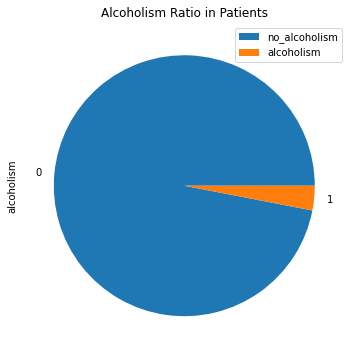

In [91]:
alcohol_ratio = df["alcoholism"].value_counts(normalize=True)
print(alcohol_ratio)
# Plot composition of "alcoholism"
fig,ax= plt.subplots(figsize=(15,6))
labels=["no_alcoholism","alcoholism"]
alcohol_ratio.plot.pie(ax=ax)
plt.legend(labels, loc= 0)
plt.title("Alcoholism Ratio in Patients");

Only about **3%** of our patients suffer from Alcoholism

Again, just like I did in the previous research question, I would use the "plot_countplot" function to create side-by-side countplot visualization of the relationship between "*alcoholism*" and "*no_show" columns

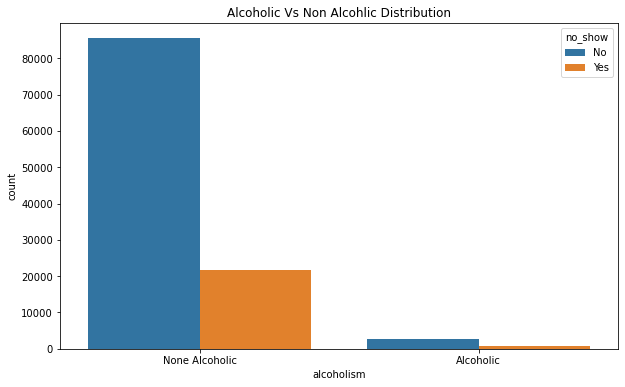

In [92]:
fig= plot_countplot("alcoholism","no_show")
fig.set_xticklabels(["None Alcoholic","Alcoholic"])
plt.title("Alcoholic Vs Non Alcohlic Distribution");

The above Chart does not give me any assmuptions that could make some headway to answer so let us check out the statistics instead

For this I would create two DataFrames (*df_alcohol and df_non_alcohol*) for patients who suffer from alcoholism i.e "*alcoholism*"==1 and patients who do not suffer from alcoholism i.e "*alcoholism*"==0

In [93]:
# Create df_alcohol mask
mask = df["alcoholism"]==1

# Create df_alcohol
df_alcohol = df[mask]
df_alcohol.shape

(3360, 14)

In [94]:
# Create df_non_alcohol mask
mask = df["alcoholism"]==0

# Create df_non_alcohol
df_non_alcohol = df[mask]
df_non_alcohol.shape

(107167, 14)

Now let us check for the proportion of *"no_show"* in each of our DataFrames

In [95]:
df_non_alcohol["no_show"].value_counts(normalize=True)

No     0.798054
Yes    0.201946
Name: no_show, dtype: float64

In [96]:
df_alcohol["no_show"].value_counts(normalize=True)

No     0.798512
Yes    0.201488
Name: no_show, dtype: float64

It seems like over **80%** of patients with alcoholism and also over **80%** of patients without alcoholism showed up for their appointments. 

<a id='conclusions'></a>
## Conclusions

**1**. For Research Question 1, We can see that patients living in "**ILHA DO BOI**" and "**AEROPORTO**" showed up more for their appointments with only about **9%** and **13%** of them not showing up for appointment respectively.
In contrast with over **20%** of the entire dataset that did not show up for their appoinments.

On the Contrary, neighbourhoods "**SANTOS DUMONT**" and "**SANTA CLARA**" have the highest proportion of patients who did not show up for their appointments with over **29%** and **27%** of patients living in those neighbourhoods not ahowing up respectively.

Neigbourhoods "**ILHAS OCEÂNICAS DE TRINDADE" AND "PARQUE INDUSTRIAL"** both appeared only **3** times in the entire dataset so their outcomes in this analysis exhibited outlier behaviours.

**2**. For Research Question 2, it seems that contrary to what I would have assumed SMS received seems to have been a negative factor as to whether a patient showed up for appointment
Or that SMS recieved has no influence on whether or not the patients show up for appointment
That is infact a **Limitation** of this study as I did not check for any correlation between the "*sms_recieved"* and *"no_show*" variables

**3**. For Research Question 3, From over 3,000 patients who suffer from alcoholism, over **80%** of them showed up for appointment,which is almost the same proportion with that of the patients who do not suffer from alcoholism.
So, we can infer from this dataset that patients who suffer from alcoholism did not statistically miss appointment more than those that do not.